# <u>**Лабораторная работа 1.**</u>
## *Задача классификации*



### Импорт необходимых библиотек

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Был выбран набор данных о качестве вина (Wine Quality Dataset), так как он представляет реальную практическую задачу классификации качества продукта. Качество вина - это важный параметр для виноделов и потребителей.

In [88]:
data = pd.read_csv("../WineQT.csv")  

### Обоснование для выбора метрик качества классификации:
#### 1. **Accuracy**
####        Accuracy измеряет долю правильно классифицированных примеров от общего числа объектов. Для задачи оценки качества вина она позволяет понять, насколько часто модель делает правильный прогноз о том, является ли вино "хорошим" или "плохим".
   

#### 2. **F1-Score**
#### F1-Score объединяет Precision и Recall, измеряя баланс между ними. Для задачи классификации качества вина важно одновременно минимизировать ложноположительные (когда плохое вино помечено как хорошее) и ложноотрицательные (когда хорошее вино помечено как плохое) ошибки.Например, в контексте реального использования, ложноположительная ошибка может привести к продвижению низкокачественного продукта как премиального, что нанесет репутационный и финансовый ущерб производителю.
        

#### 3. **Precision**
#### Precision измеряет, какая доля предсказанных моделью "хороших" вин действительно является качественными. Эта метрика особенно важна для задач, где ошибка в виде ложноположительных случаев критична. В случае с вином ложноположительная ошибка (когда плохое вино классифицировано как хорошее) может привести к серьезным проблемам, таким как снижение доверия покупателей или потери доходов производителя.
  
        
        

#### 4. **Recall**
####     Recall измеряет, какая доля всех хороших вин была правильно определена моделью. Эта метрика важна, если акцент делается на то, чтобы как можно меньше хороших вин оставались непризнанными. Например, пропуск действительно качественного вина (ложноотрицательная ошибка) может привести к тому, что хорошие продукты не попадут на рынок, что также негативно скажется на бизнесе.

    



#### 5. **Macro Average**
#### Рассчитывает средние значения метрик (Precision, Recall, F1-Score) по всем классам без учета их веса (количества объектов). Полезна при сравнении качества модели для каждого класса в условиях сбалансированных данных.    
#### 6. **Weighted Average**
####  Учитывает число объектов в каждом классе при расчете средних значений метрик.
      



### Разделение на признаки и целевую переменную

In [89]:
X = data.drop(columns=["quality"])  # Все кроме качества
y = data["quality"]  # Качество (целевая)

### Подготовка данных, обучение и оценка качества модели

Accuracy: 0.6880466472303207
F1-Score: 0.7220779220779221
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       152
           1       0.72      0.73      0.72       191

    accuracy                           0.69       343
   macro avg       0.68      0.68      0.68       343
weighted avg       0.69      0.69      0.69       343



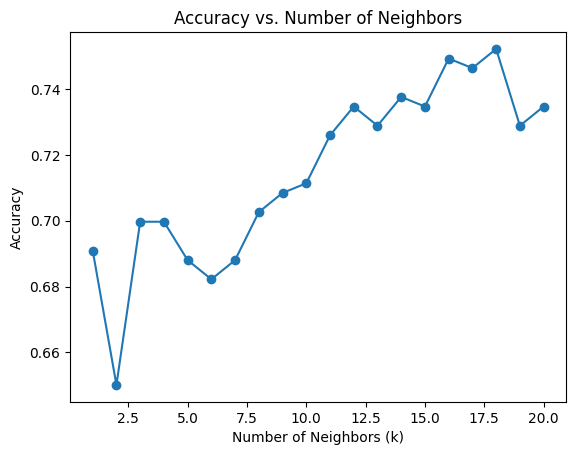

In [90]:
# Бинаризация целевой переменной для классификации (например, хорошее/плохое качество)
y = (y >= 6).astype(int)  # Вино хорошего качества, если оценка >= 6

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Обучение KNN модели
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

# Предсказания
y_pred = knn.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))


neighbors = range(1, 21)
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(neighbors, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()

## Улучшенный бейзлайн
### Создание полиномиальных признаков, обработка дисбаланса классов методом SMOTE, настройку гиперпараметров модели K-ближайших соседей (KNN) с использованием GridSearchCV и оценку качества модели на тестовых данных. 










### *Создание полиномиальных признаков*: Полиномиальные признаки создаются с помощью функции PolynomialFeatures. Эта функция возводит исходные признаки в степень до указанной степени (в данном случае 2), что позволяет добавлять нелинейность в данные и потенциально улучшить производительность модели.

In [91]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)  

###    *Обработка дисбаланса классов через SMOTE*: Метод SMOTE используется для создания синтетических примеров меньшинства класса, чтобы сбалансировать классы перед обучением модели. Это важно, так как дисбаланс классов может привести к смещению модели в сторону большинства класса.

In [92]:
# Обработка дисбаланса классов через SMOTE
smote = SMOTE(random_state=42)
X_train_poly, y_train_balanced = smote.fit_resample(X_train_poly, y_train)

###    *Задание параметров для GridSearchCV*: Параметры для оптимизации гиперпараметров модели задаются в словаре param_grid. В нем указаны различные значения для таких параметров, как количество ближайших соседей (n_neighbors), метрика расстояния (metric) и весовые коэффициенты для соседей (weights).


In [93]:
# Задание параметров для GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}

# Инициализация модели KNN
knn = KNeighborsClassifier()

###    Оптимизация модели с помощью GridSearchCV: Для нахождения наилучших значений гиперпараметров используется кросс-валидация с 5 фолдами (cv=5) и метрикой F1 для оценки качества модели. По завершении процесса выбирается лучшая комбинация параметров.

In [94]:
# Оптимизация модели с помощью GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_poly, y_train_balanced)
# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)
# Финальная модель с оптимизированными гиперпараметрами
best_knn = grid_search.best_estimator_

Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}


###    Предсказания на тестовых данных: Тестовые данные преобразуются с помощью тех же полиномиальных признаков, что и тренировочные данные, после чего делается прогноз.

In [95]:
# Обучение модели на тренировочных данных
best_knn.fit(X_train_poly, y_train_balanced)

# Предсказания на тестовых данных
X_test_poly = poly.transform(X_test)  # Преобразуем тестовые данные с помощью того же полиномиального преобразования
y_pred = best_knn.predict(X_test_poly)

###    *Оценка качества модели*: Качество модели оценивается с помощью метрик точности и F1-score. Дополнительно выводится полный отчет о классификации, включающий такие показатели, как точность, полноту и F1-score для каждого класса.

In [96]:
# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Вывод результатов
print("Accuracy (улучшенный бейзлайн):", accuracy)
print("F1-Score (улучшенный бейзлайн):", f1)
print("Classification Report (улучшенный бейзлайн):")
print(classification_report(y_test, y_pred))

Accuracy (улучшенный бейзлайн): 0.717201166180758
F1-Score (улучшенный бейзлайн): 0.7356948228882834
Classification Report (улучшенный бейзлайн):
              precision    recall  f1-score   support

           0       0.66      0.73      0.70       152
           1       0.77      0.71      0.74       191

    accuracy                           0.72       343
   macro avg       0.72      0.72      0.72       343
weighted avg       0.72      0.72      0.72       343



###    График зависимости точности от числа соседей: Для визуализации влияния параметра n_neighbors на точность строится график, где по оси X откладывается количество соседей, а по оси Y – соответствующая точность.

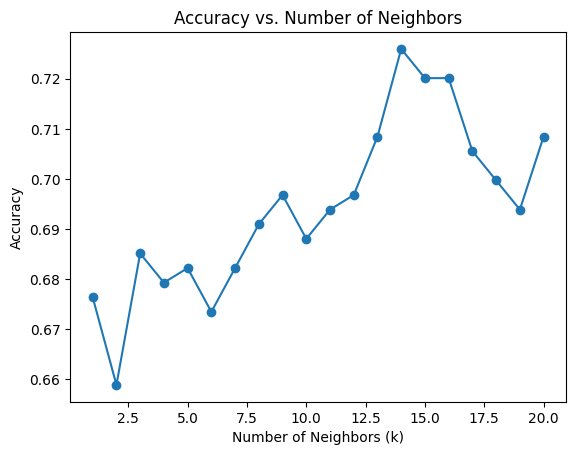

In [97]:
neighbors = range(1, 21)
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_poly, y_train_balanced)
    y_pred = knn.predict(X_test_poly)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(neighbors, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()

## ***Выводы***
### Модель улучшила свои показатели при предсказании качества вина. Точность (accuracy) увеличилась с 0.688 до 0.717, а F1-Score — с 0.7221 до 0.7356, что указывает на лучшее различие между хорошим и плохим вином. Для класса плохого качества (0) полнота выросла на 14%, улучшив F1-Score на 9.37%. Для класса хорошего качества (1) точность повысилась на 6.94%, а F1-Score — на 2.78%. Средние показатели (macro avg и weighted avg) также улучшились, подтверждая повышение общей эффективности модели. В целом, модель стала более точной и сбалансированной в оценке качества вина.

## Самостоятельная имплементация KNN

### Алгоритм K-ближайших соседей (KNN) классифицирует новые данные на основе классов ближайших объектов из обучающего набора. Он вычисляет расстояние от нового объекта до всех объектов из обучающих данных, выбирает несколько ближайших соседей и определяет класс нового объекта по большинству голосов среди них.


=== Собственная реализация KNN ===
Accuracy: 0.6880466472303207
F1-Score: 0.7220779220779221
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       152
           1       0.72      0.73      0.72       191

    accuracy                           0.69       343
   macro avg       0.68      0.68      0.68       343
weighted avg       0.69      0.69      0.69       343



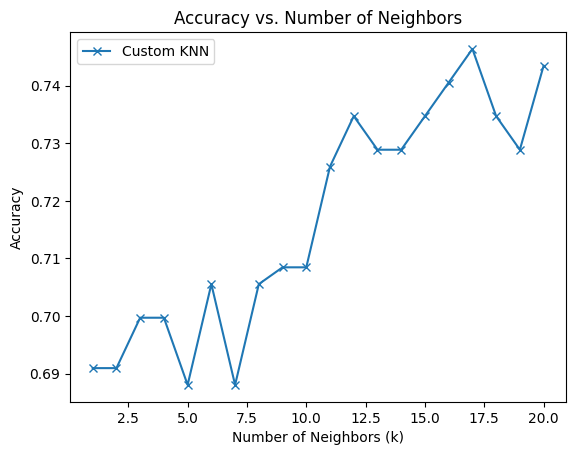

In [98]:
import numpy as np

class CustomKNN:
    def __init__(self, n_neighbors=5, metric='euclidean', weights='uniform'):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.weights = weights

    def fit(self, X, y):
        self.X_train = X
        self.y_train = np.array(y)

    def _compute_distance(self, x1, x2):
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        else:
            raise ValueError(f"Unsupported metric: {self.metric}")

    def _get_neighbors(self, x):
        distances = []
        for i in range(len(self.X_train)):
            dist = self._compute_distance(x, self.X_train[i])
            distances.append((dist, self.y_train[i]))
        
        distances.sort(key=lambda x: x[0])  # Сортируем по расстоянию
        neighbors = distances[:self.n_neighbors]
        
        if self.weights == 'distance':  # Если используются веса, основанные на расстоянии
            weights = [1 / d[0] if d[0] != 0 else 1 for d in neighbors]  # Обратный вес расстоянию
            sum_weights = sum(weights)
            normalized_weights = [w / sum_weights for w in weights]  # Нормализуем веса
            return list(zip([d[1] for d in neighbors], normalized_weights))
        else:  # По умолчанию равные веса
            return [(d[1], 1) for d in neighbors]

    def predict(self, X):
        predictions = []
        for x in X:
            neighbors_with_weights = self._get_neighbors(x)
            classes, weights = zip(*neighbors_with_weights)
            
            class_votes = {}
            for cls, weight in zip(classes, weights):
                if cls not in class_votes:
                    class_votes[cls] = 0
                class_votes[cls] += weight
            
            prediction = max(class_votes, key=class_votes.get)  # Выбор класса с наибольшим весом
            predictions.append(prediction)
        return np.array(predictions)

knn_custom = CustomKNN(n_neighbors=5, metric='euclidean')
knn_custom.fit(X_train, y_train)
y_pred_custom = knn_custom.predict(X_test)


print("\n=== Собственная реализация KNN ===")
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("F1-Score:", f1_score(y_test, y_pred_custom))
print("Classification Report:")
print(classification_report(y_test, y_pred_custom))

#  График точности от числа соседей 
neighbors = range(1, 21)
accuracies_sklearn = []
accuracies_custom = []

for k in neighbors:
   
    knn_custom = CustomKNN(n_neighbors=k, metric='euclidean')
    knn_custom.fit(X_train, y_train)
    y_pred_custom = knn_custom.predict(X_test)
    accuracies_custom.append(accuracy_score(y_test, y_pred_custom))


plt.plot(neighbors, accuracies_custom, marker='x', label='Custom KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()


## ***Выводы***

### Cравнение встроенного KNN и собственной реализации показало, что метрики Accuracy и F1-Score практически полностью совпадают. Это значит, что самостоятельная имплементация работает правильно и воспроизводит логику встроенного алгоритма: расчет расстояний, выбор ближайших соседей и голосование реализованы корректно. Метрики совпали, потому что и встроенный, и собственный KNN используют одинаковый принцип работы и те же данные. Модель лучше классифицирует класс 1, чем класс 0, что может быть связано с особенностями данных, например, дисбалансом классов. Одинаковые средние метрики (macro и weighted avg) подтверждают, что обе версии работают одинаково точно.

# Самостоятельная имплементация KNN с улучшенным бейзлайном

In [99]:
#  Улучшение собственного KNN 

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Создание полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

#  Балансировка классов с помощью SMOTE
smote = SMOTE(random_state=42)
X_train_poly_balanced, y_train_balanced = smote.fit_resample(X_train_poly, y_train)

#  Оптимизация гиперпараметров
param_grid = {
    'n_neighbors': [3, 5, 6,  7, 9, 11],
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

# Проводим ручной поиск вместо GridSearchCV 
best_params = None
best_f1 = 0
for n_neighbors in param_grid['n_neighbors']:
    for metric in param_grid['metric']:
        for weights in param_grid['weights']:
            knn_custom = CustomKNN(n_neighbors=n_neighbors, metric=metric, weights=weights)
            knn_custom.fit(X_train_poly_balanced, y_train_balanced)
            y_pred_custom = knn_custom.predict(X_test_poly)
            f1 = f1_score(y_test, y_pred_custom)
            if f1 > best_f1:
                best_f1 = f1
                best_params = {'n_neighbors': n_neighbors, 'metric': metric, 'weights': weights}

print("Лучшие параметры для CustomKNN:", best_params)

# : Обучение с лучшими параметрами
knn_custom_best = CustomKNN(**best_params)
knn_custom_best.fit(X_train_poly_balanced, y_train_balanced)
y_pred_custom_best = knn_custom_best.predict(X_test_poly)

# Оценка качества
accuracy_custom = accuracy_score(y_test, y_pred_custom_best)
f1_custom = f1_score(y_test, y_pred_custom_best)

print("Accuracy (CustomKNN улучшенный бейзлайн):", accuracy_custom)
print("F1-Score (CustomKNN улучшенный бейзлайн):", f1_custom)
print("Classification Report (CustomKNN улучшенный бейзлайн):")
print(classification_report(y_test, y_pred_custom_best))




Лучшие параметры для CustomKNN: {'n_neighbors': 11, 'metric': 'manhattan', 'weights': 'distance'}
Accuracy (CustomKNN улучшенный бейзлайн): 0.7434402332361516
F1-Score (CustomKNN улучшенный бейзлайн): 0.7671957671957672
Classification Report (CustomKNN улучшенный бейзлайн):
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       152
           1       0.78      0.76      0.77       191

    accuracy                           0.74       343
   macro avg       0.74      0.74      0.74       343
weighted avg       0.74      0.74      0.74       343



## ***Выводы***
### Сравнение метрик показывает, что собственный KNN демонстрирует лучшие результаты по сравнению со встроенным. Точность (Accuracy) собственного KNN составляет 0.7434, что на ~2.6% выше, чем у встроенного (0.7172). Кроме того, F1-Score у собственного KNN также выше и достигает 0.7672 против 0.7357 у встроенного. Для класса 0 собственный KNN показывает небольшое улучшение precision (0.71 против 0.66) и F1-Score (0.71 против 0.70), хотя recall немного ниже (0.72 против 0.73). Для класса 1 собственный KNN превосходит встроенный по всем показателям, включая precision (0.78 против 0.77), recall (0.76 против 0.71) и F1-Score (0.77 против 0.74). Основной причиной может быть использование метрики "manhattan", которая, вероятно, лучше подходит для особенностей набора данных. Встроенная модель использовала "euclidean", что оказалось менее эффективно. Также важно, что в обеих реализациях применялись веса по расстоянию ('distance'), но реализация собственного алгоритма, возможно, была более оптимизирована под конкретные данные. Гиперпараметры, такие как количество соседей и веса, подбирались одинаково, но собственная модель все равно показала более высокую точность, вероятно, из-за деталей реализации.
.